# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

age,sex,bmi,children,smoker,region,charges
18,male,22.99,0,no,northeast,1704.5681
18,male,33.77,1,no,southeast,1725.5523
18,female,37.29,1,no,southeast,2219.4451
18,male,33.66,0,no,southeast,1136.3994
18,female,32.12,2,no,southeast,2801.2588
18,female,38.28,0,no,southeast,1631.8212
18,female,26.73,0,no,southeast,1615.7667
18,female,28.215,0,no,northeast,2200.83085
18,female,36.85,0,yes,southeast,36149.4835
18,male,31.68,2,yes,southeast,34303.1672


In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

age,sex,bmi,children,smoker,region,charges,sampleid
18,male,43.01,0,no,southeast,1149.3959,2
18,female,31.13,0,no,southeast,1621.8827,1
18,female,42.24,0,yes,southeast,38792.6856,1
18,male,34.1,0,no,southeast,1137.011,1
18,male,28.31,1,no,northeast,11272.33139,1
18,male,53.13,0,no,southeast,1163.4627,2
18,male,38.17,0,yes,southeast,36307.7983,1
18,male,33.33,0,no,southeast,1135.9407,2
18,male,25.175,0,yes,northeast,15518.18025,1
18,female,30.115,0,no,northeast,21344.8467,1


In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

age,sex,bmi,children,smoker,region,charges
18,female,26.315,0,no,northeast,2198.18985
18,female,31.92,0,no,northeast,2205.9808
18,female,27.28,3,yes,southeast,18223.4512
18,male,30.4,3,no,northeast,3481.868
18,male,25.175,0,yes,northeast,15518.18025
18,female,30.305,0,no,northeast,2203.73595
18,male,22.99,0,no,northeast,1704.5681
18,male,28.31,1,no,northeast,11272.33139
18,male,39.14,0,no,northeast,12890.05765
18,male,30.03,1,no,southeast,1720.3537


In [14]:
# test dataset
insurance_df_test.head()

age,sex,bmi,children,smoker,region,charges
18,male,23.32,1,no,southeast,1711.0268
18,female,39.82,0,no,southeast,1633.9618
18,male,26.125,0,no,northeast,1708.92575
18,female,31.35,4,no,northeast,4561.1885
18,female,40.28,0,no,northeast,2217.6012
18,female,33.155,0,no,northeast,2207.69745
18,male,23.75,0,no,northeast,1705.6245
18,female,36.85,0,no,southeast,1629.8335
18,male,33.33,0,no,southeast,1135.9407
18,female,35.625,0,no,northeast,2211.13075


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 500 sec
# and verbose level 2 for detailed loggging

aml = AutoRegressor(max_runtime_secs=500, 
                    verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
bmi,FLOAT,1070,0,None,0,1070,0,0.0,100.0
smoker,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
charges,FLOAT,1070,0,None,0,1070,0,0.0,100.0
region,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
sex,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
age,INTEGER,1070,0,None,0,1070,0,0.0,100.0
children,INTEGER,1070,0,None,468,602,0,0.0,100.0



Statistics of Data:


func,age,bmi,children,charges
min,18,15.96,0,1121.874
std,13.969,5.96,1.188,12272.613
25%,27,26.4,0,4854.685
50%,40,30.2,1,9467.447
75%,51,34.471,2,17442.179
max,64,52.58,5,62592.873
mean,39.404,30.579,1.073,13517.12
count,1070,1070,1070,1070



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


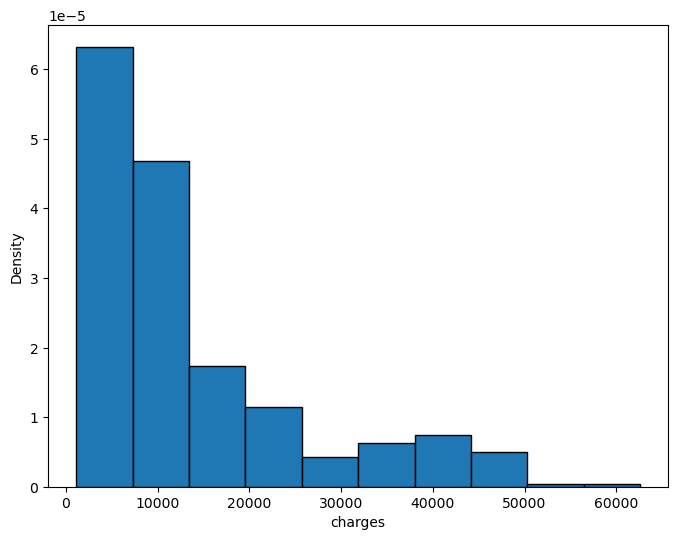

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges           9.439252
1        bmi           0.560748


age,sex,bmi,children,smoker,region,charges
32,female,17.765,2,yes,northwest,32734.1863
61,female,28.2,0,no,southwest,13041.921
61,female,21.09,0,no,northwest,13415.0381
49,female,27.17,0,no,southeast,8601.3293
40,female,27.4,1,no,southwest,6496.886
40,male,24.97,2,no,southeast,6593.5083
19,female,21.7,0,yes,southwest,13844.506
19,male,20.615,2,no,northwest,2803.69785
34,male,34.21,0,no,southeast,3935.1799
34,male,30.8,0,yes,southwest,35491.64


Remaining Rows in the data: 1069                                                        
Remaining Columns in the data: 7


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711980045804767"'19


['sex', 'smoker', 'region']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
34,0,1,34.21,0,1,0,0,0,1,0,3935.1799,9
40,1,0,27.4,1,1,0,0,0,0,1,6496.886,10
40,0,1,24.97,2,1,0,0,0,1,0,6593.5083,18
49,1,0,27.17,0,1,0,0,0,1,0,8601.3293,13
61,1,0,28.2,0,1,0,0,0,0,1,13041.921,14
61,1,0,21.09,0,1,0,0,1,0,0,13415.0381,22
19,1,0,21.7,0,0,1,0,0,0,1,13844.506,11
19,0,1,20.615,2,1,0,0,1,0,0,2803.69785,19
38,0,1,29.26,2,1,0,0,1,0,0,6457.8434,12
38,0,1,28.025,1,1,0,1,0,0,0,6067.12675,20


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
49,0,1,25.84,2,0,1,0,1,0,0,23807.2406,29
38,1,0,19.95,2,1,0,1,0,0,0,7133.9025,28
38,1,0,34.8,2,1,0,0,0,0,1,6571.544,124
61,1,0,29.07,0,0,1,0,1,0,0,29141.3603,30
34,1,0,19.0,3,1,0,1,0,0,0,6753.038,25
34,1,0,27.5,1,1,0,0,0,0,1,5003.853,121
32,1,0,29.735,0,1,0,0,1,0,0,4357.04365,31
32,1,0,24.6,0,0,1,0,0,0,1,17496.306,127
40,0,1,32.775,1,0,1,1,0,0,0,39125.33225,26
40,0,1,29.9,2,1,0,0,0,0,1,6600.361,122


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges           9.541628
1        bmi           0.561272


['bmi']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711974987902350"'19


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711974252188521"'19
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711973838194533"'


['region_0', 'age', 'smoker_1', 'smoker_0', 'children', 'bmi']


['age', 'children', 'bmi']


id,smoker_0,region_0,smoker_1,charges,age,children,bmi
40,1,1,0,24671.6633,-0.9666007603220693,2.502396794976323,-0.1374160854018952
1264,1,0,0,10602.385,1.1822465992390665,-0.8942860341021156,1.717053062517439
326,1,1,0,3268.8466,-0.8233442696846603,-0.8942860341021156,0.8707123116142913
734,1,0,0,10450.552,1.0389901086016573,-0.045115326832505916,1.5952774149054758
183,1,0,0,11520.0999,0.8241053726455438,2.502396794976323,-1.0463843122197682
530,1,1,0,2731.9122,-1.2531137415968874,-0.8942860341021156,-1.2612313476494472
835,1,0,0,4527.183,-0.6800877790472513,-0.045115326832505916,-0.35226312083157413
938,1,0,0,4762.329,-0.3219465524537286,-0.045115326832505916,1.4213122040312418
265,0,0,1,49577.6624,1.7552725617887026,0.8040553804371038,1.1360092581974979
469,0,0,1,24520.264,0.7524771273268392,-0.045115326832505916,-0.49230511558533246


id,smoker_0,region_0,smoker_1,charges,age,children,bmi
120,1,0,0,3378.91,-0.9666007603220693,-0.045115326832505916,-1.849233760404358
242,1,0,0,12646.207,1.253874844557771,0.8040553804371038,1.3169330775067012
894,1,0,0,3260.199,-0.6084595337285467,-0.8942860341021156,-1.7448546338798179
244,0,0,1,44423.803,1.110618353920362,-0.8942860341021156,0.8298304870588463
1283,1,0,0,9788.8659,0.39433590073331665,3.3515675022459326,-1.0646506593615628
1483,0,1,1,15359.1045,-1.3247419869155919,-0.045115326832505916,-1.492605078112178
570,1,0,0,15019.7601,1.6120160711512936,0.8040553804371038,0.011324169895574963
122,1,0,0,6600.361,0.03619467413979402,0.8040553804371038,-0.09218513057459471
549,1,0,0,8978.1851,0.6092206366894303,0.8040553804371038,1.193417777785995
814,1,0,0,4350.5144,-0.6084595337285467,-0.045115326832505916,-0.20352286553410395


['region_0', 'sex_0', 'age', 'region_2', 'smoker_1', 'region_1', 'smoker_0', 'children', 'bmi']


['r_age', 'r_children', 'r_bmi']


id,r_sex_0,r_region_0,r_region_1,r_smoker_0,charges,r_smoker_1,r_region_2,r_age,r_children,r_bmi
40,1,1,0,1,24671.6633,0,0,-0.9666007603220693,2.502396794976323,-0.1374160854018952
1264,0,0,0,1,10602.385,0,0,1.1822465992390665,-0.8942860341021156,1.717053062517439
326,0,1,0,1,3268.8466,0,0,-0.8233442696846603,-0.8942860341021156,0.8707123116142913
734,0,0,0,1,10450.552,0,0,1.0389901086016573,-0.045115326832505916,1.5952774149054758
183,0,0,1,1,11520.0999,0,0,0.8241053726455438,2.502396794976323,-1.0463843122197682
530,1,1,0,1,2731.9122,0,0,-1.2531137415968874,-0.8942860341021156,-1.2612313476494472
835,1,0,1,1,4527.183,0,0,-0.6800877790472513,-0.045115326832505916,-0.35226312083157413
938,0,0,0,1,4762.329,0,0,-0.3219465524537286,-0.045115326832505916,1.4213122040312418
265,0,0,0,0,49577.6624,1,1,1.7552725617887026,0.8040553804371038,1.1360092581974979
469,1,0,0,0,24520.264,1,0,0.7524771273268392,-0.045115326832505916,-0.49230511558533246


id,r_sex_0,r_region_0,r_region_1,r_smoker_0,charges,r_smoker_1,r_region_2,r_age,r_children,r_bmi
120,1,0,0,1,3378.91,0,0,-0.9666007603220693,-0.045115326832505916,-1.849233760404358
242,1,0,0,1,12646.207,0,0,1.253874844557771,0.8040553804371038,1.3169330775067012
894,0,0,0,1,3260.199,0,0,-0.6084595337285467,-0.8942860341021156,-1.7448546338798179
244,1,0,0,0,44423.803,1,1,1.110618353920362,-0.8942860341021156,0.8298304870588463
1283,0,0,0,1,9788.8659,0,1,0.39433590073331665,3.3515675022459326,-1.0646506593615628
1483,1,1,0,0,15359.1045,1,0,-1.3247419869155919,-0.045115326832505916,-1.492605078112178
570,1,0,1,1,15019.7601,0,0,1.6120160711512936,0.8040553804371038,0.011324169895574963
122,0,0,0,1,6600.361,0,0,0.03619467413979402,0.8040553804371038,-0.09218513057459471
549,0,0,0,1,8978.1851,0,1,0.6092206366894303,0.8040553804371038,1.193417777785995
814,1,0,0,1,4350.5144,0,1,-0.6084595337285467,-0.045115326832505916,-0.20352286553410395


['age', 'bmi', 'children']


id,smoker_0,region_0,sex_0,region_3,region_2,smoker_1,region_1,sex_1,charges,age,bmi,children
82,1,0,1,0,1,0,0,0,7682.67,0.03619467413979398,0.4471070231355298,1.6532260877067184
96,1,0,1,1,0,0,0,0,3987.926,-0.9666007603220682,0.6558652761846111,0.8040553804371061
48,1,0,1,0,1,0,0,0,3392.9768,-0.9666007603220682,-0.08870582635711072,-0.045115326832506054
71,1,0,1,0,0,0,1,0,6128.79745,-0.5368312884098416,0.47407163082103626,1.6532260877067184
13,1,0,1,0,1,0,0,0,8601.3293,0.680848882008134,-0.5671101562612543,-0.8942860341021183
21,1,0,1,0,1,0,0,0,10381.4787,0.680848882008134,1.0786007386089997,1.6532260877067184
38,0,1,1,0,0,1,0,0,48517.56315,1.5403878258325874,1.0359792619448116,-0.045115326832506054
102,1,0,1,0,1,0,0,0,36580.28216,1.5403878258325874,0.5045155427240268,2.5023967949763306
107,1,0,1,0,0,0,1,0,2709.1119,-1.4679984775529993,-1.0298576171867169,-0.045115326832506054
91,1,0,0,1,0,0,0,1,1832.094,-1.4679984775529993,-1.6578720284427022,-0.045115326832506054


id,smoker_0,region_0,sex_0,region_3,region_2,smoker_1,region_1,sex_1,charges,age,bmi,children
24,1,0,1,0,0,0,1,0,3201.24515,-0.9666007603220682,1.6970470632669017,-0.8942860341021183
29,0,0,0,0,0,1,1,1,23807.2406,0.680848882008134,-0.7984838867239858,0.8040553804371061
125,1,1,0,0,0,0,0,1,9290.1395,0.680848882008134,0.1600644251930439,-0.045115326832506054
31,1,0,1,0,0,0,1,0,4357.04365,-0.5368312884098416,-0.1208893903688444,-0.8942860341021183
30,0,0,1,0,0,1,1,0,29141.3603,1.5403878258325874,-0.2365762556002099,-0.8942860341021183
126,1,0,1,0,1,0,0,0,24513.09126,1.5403878258325874,-0.930697446988404,-0.8942860341021183
26,0,1,0,0,0,1,0,1,39125.33225,0.03619467413979398,0.4079648506888269,-0.045115326832506054
122,1,0,0,1,0,0,0,1,6600.361,0.03619467413979398,-0.09218513057459594,0.8040553804371061
28,1,1,1,0,0,0,0,0,7133.9025,-0.10706181649761491,-1.8231389787732244,0.8040553804371061
124,1,0,1,1,0,0,0,0,6571.544,-0.10706181649761491,0.7602444027091505,0.8040553804371061


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6']


response_column : charges                                                                                                                             
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : charges
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
Total number of models for xgboost : 2592
-------------------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_6                                                                                                                                                                                        
DECISIONFOREST_7                                                                          
DECISIONFOREST_5                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_5                                                                                 


KNN_9                                                                                                                                                                                                   
KNN_22                                                                                    
KNN_17                                                                                    


SVM_3                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


GLM_3                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,2951.596020,2.313579e+07,0.183532,4809.968059,0.428407,0.856821,0.852671
1,2,decision_forest,rfe,3154.765397,2.530273e+07,0.227087,5030.181714,0.476536,0.843411,0.836502
2,3,knn,lasso,2787.693836,2.700204e+07,0.161384,5196.348607,0.401727,0.832894,0.828051
3,4,knn,pca,3075.192987,2.753500e+07,0.155820,5247.379825,0.394740,0.829596,0.823806
4,5,knn,rfe,2981.126709,2.782425e+07,0.153340,5274.869630,0.391587,0.827806,0.820209
5,6,decision_forest,pca,3838.834457,3.535120e+07,0.232131,5945.687372,0.481799,0.781225,0.773790
6,7,glm,lasso,4472.063409,3.907818e+07,0.296162,6251.254028,0.544208,0.758160,0.751150
7,8,glm,rfe,4956.069956,4.526305e+07,0.306791,6727.781810,0.553887,0.719884,0.707526
8,9,glm,pca,4947.745937,4.973268e+07,0.304673,7052.139798,0.551972,0.692223,0.681764
9,10,svm,lasso,13697.703822,3.492797e+08,36.576961,18689.025439,6.047889,-1.161562,-1.224216


In [16]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,2951.596020,2.313579e+07,0.183532,4809.968059,0.428407,0.856821,0.852671
1,2,decision_forest,rfe,3154.765397,2.530273e+07,0.227087,5030.181714,0.476536,0.843411,0.836502
2,3,knn,lasso,2787.693836,2.700204e+07,0.161384,5196.348607,0.401727,0.832894,0.828051
3,4,knn,pca,3075.192987,2.753500e+07,0.155820,5247.379825,0.394740,0.829596,0.823806
4,5,knn,rfe,2981.126709,2.782425e+07,0.153340,5274.869630,0.391587,0.827806,0.820209
5,6,decision_forest,pca,3838.834457,3.535120e+07,0.232131,5945.687372,0.481799,0.781225,0.773790
6,7,glm,lasso,4472.063409,3.907818e+07,0.296162,6251.254028,0.544208,0.758160,0.751150
7,8,glm,rfe,4956.069956,4.526305e+07,0.306791,6727.781810,0.553887,0.719884,0.707526
8,9,glm,pca,4947.745937,4.973268e+07,0.304673,7052.139798,0.551972,0.692223,0.681764
9,10,svm,lasso,13697.703822,3.492797e+08,36.576961,18689.025439,6.047889,-1.161562,-1.224216


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,2951.59602,2.313579e+07,0.183532,4809.968059,0.428407,0.856821,0.852671


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

decision_forest rfe

 Prediction : 
      charges    id    prediction  confidence_lower  confidence_upper
0   3378.9100   120   6220.040595       3457.772684       8982.308506
1  12646.2070   242  15506.463133      12175.246766      18837.679500
2   3260.1990   894   5917.518596       3850.904913       7984.132280
3  44423.8030   244  44892.566103      42483.058049      47302.074157
4   9788.8659  1283  10959.844965       7894.663361      14025.026569
5  15359.1045  1483  20799.869886      18248.465850      23351.273922
6  15019.7601   570  15728.179000      12415.391059      19040.966940
7   6600.3610   122   7091.397956       6597.491194       7585.304717
8   8978.1851   549   9500.677671       7817.727932      11183.627410
9   4350.5144   814   5565.986557       4699.995051       6431.978063

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV         MPD       MGD
0  3154.765397  2.530273e+07 

In [20]:
# Printing prediction
prediction.head()

charges,id,prediction,confidence_lower,confidence_upper
1252.407,211,4679.387568521436,2109.1630299251883,7249.612107117684
1639.5631,203,5134.209670246116,2487.076337415327,7781.343003076905
1664.9996,546,3003.9141179990934,2082.3558258980565,3925.47241010013
1674.6323,450,2806.0867005075047,2134.2802306208823,3477.893170394127
1727.54,1000,4932.225044874093,2328.026040030931,7536.424049717256
1759.338,187,6321.411723110119,3564.5832645934925,9078.240181626745
1725.5523,816,4932.225044874093,2328.026040030931,7536.424049717256
1526.312,1459,2819.620031459886,2162.675706371498,3476.5643565482737
1141.4451,944,5264.8264702300685,2535.7850236083214,7993.867916851816
1131.5066,960,5515.55632310477,2574.9981185076613,8456.114527701879


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711974876920869"'

Updated dataset after performing categorical encoding :


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
38,0,1,38.39,3,0,1,0,0,1,0,41949.2441,68
38,0,1,21.12,3,1,0,0,0,1,0,6652.5288,12
38,1,0,27.835,2,1,0,1,0,0,0,7144.86265,28
38,1,0,30.21,3,1,0,0,1,0,0,7537.1639,44
55,1,0,32.395,1,1,0,1,0,0,0,11879.10405,92
55,1,0,33.535,2,1,0,0,1,0,0,12269.68865,84
38,1,0,27.265,1,1,0,1,0,0,0,6555.07035,36
38,0,1,34.7,2,1,0,0,0,0,1,6082.405,60
38,1,0,37.73,0,1,0,0,0,1,0,5397.6167,20
38,0,1,16.815,2,1,0,1,0,0,0,6640.54485,52


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711978232870543"'

Updated dataset after performing Lasso feature selection:


id,region_0,age,smoker_1,smoker_0,children,bmi,charges
181,0,48,0,1,1,36.67,28468.919
36,1,38,0,1,1,27.265,6555.0703
116,0,29,0,1,1,29.59,3947.4131
238,0,54,0,1,2,46.7,11538.421
28,1,38,0,1,2,27.835,7144.8627
251,0,30,1,0,3,39.05,40932.4295
154,1,37,1,0,1,34.2,39047.285
160,1,18,1,0,2,17.29,12829.4551
141,0,50,0,1,1,37.07,9048.0273
61,1,49,0,1,2,33.345,10370.9125



Updated dataset after performing scaling on Lasso selected features :


id,smoker_0,region_0,smoker_1,charges,age,children,bmi
101,1,1,0,9222.4026,0.10782291945849855,3.3515675022459326,-0.1374160854018952
80,1,0,0,2257.4752,-1.3963702322342966,-0.8942860341021156,-0.25310295063326066
242,1,0,0,5846.9176,-0.3219465524537286,0.8040553804371038,2.2459073035751116
122,1,0,0,12979.358,1.6120160711512936,-0.8942860341021156,1.2125539509821606
61,1,1,0,10370.9125,0.6808488820081348,0.8040553804371038,0.5071250208871415
141,1,0,0,9048.0273,0.7524771273268392,-0.045115326832505916,1.1551454313936635
162,0,0,1,40419.0191,-0.17869006181631955,-0.8942860341021156,1.3847795097476525
223,1,1,0,2899.4893,-1.181485496278183,-0.8942860341021156,0.7715521414159778
183,1,0,0,6356.2707,-0.03543357117891051,0.8040553804371038,2.60949459430226
221,1,0,0,15170.069,1.6836443164699981,1.6532260877067133,1.630070457080322



Updated dataset after performing RFE feature selection:


id,region_0,sex_0,age,region_2,smoker_1,region_1,smoker_0,children,bmi,charges
34,0,1,57,0,0,0,1,1,20.1,12032.326
156,0,1,46,0,0,0,1,2,30.2,8825.086
13,0,1,49,0,0,0,1,5,31.9,11552.904
11,0,0,19,0,0,0,1,0,35.4,1263.249
89,0,1,33,0,1,0,0,0,33.5,37079.372
68,0,0,38,1,1,0,0,3,38.39,41949.2441
9,0,0,34,1,1,0,0,2,25.3,18972.495
299,0,0,47,1,1,0,0,1,25.41,21978.6769
17,0,1,34,1,0,0,1,1,26.73,5002.7827
101,1,0,41,0,0,0,1,5,29.64,9222.4026



Updated dataset after performing scaling on RFE selected features :


id,r_sex_0,r_region_0,r_region_1,r_smoker_0,charges,r_smoker_1,r_region_2,r_age,r_children,r_bmi
183,0,0,0,1,6356.2707,0,1,-0.03543357117891051,0.8040553804371038,2.60949459430226
61,1,1,0,1,10370.9125,0,0,0.6808488820081348,0.8040553804371038,0.5071250208871415
141,0,0,0,1,9048.0273,0,1,0.7524771273268392,-0.045115326832505916,1.1551454313936635
80,1,0,1,1,2257.4752,0,0,-1.3963702322342966,-0.8942860341021156,-0.25310295063326066
326,0,1,0,0,39556.4945,1,0,0.3227076554146121,-0.045115326832505916,0.16006442519304512
99,0,0,0,0,32548.3405,1,1,-1.467998477553001,-0.8942860341021156,-0.031297306768612546
162,1,0,0,0,40419.0191,1,1,-0.17869006181631955,-0.8942860341021156,1.3847795097476525
223,1,1,0,1,2899.4893,0,0,-1.181485496278183,-0.8942860341021156,0.7715521414159778
122,0,0,0,1,12979.358,0,0,1.6120160711512936,-0.8942860341021156,1.2125539509821606
387,1,0,1,1,3579.8287,0,0,-1.3247419869155919,0.8040553804371038,0.5567051059862989



Updated dataset after performing scaling for PCA feature selection :


id,smoker_0,region_0,sex_0,region_3,region_2,smoker_1,region_1,sex_1,charges,age,bmi,children
326,0,1,0,0,0,1,0,1,39556.4945,0.32270765541461177,0.1600644251930439,-0.045115326832506054
162,0,0,1,0,1,1,0,0,40419.0191,-0.17869006181631936,1.3847795097476512,-0.8942860341021183
223,1,1,1,0,0,0,0,0,2899.4893,-1.1814854962781816,0.7715521414159766,-0.8942860341021183
101,1,1,0,0,0,0,0,1,9222.4026,0.10782291945849842,-0.13741608540189643,3.351567502245943
122,1,0,0,1,0,0,0,1,12979.358,1.6120160711512916,1.2125539509821592,-0.8942860341021183
387,1,0,1,0,0,0,1,0,3579.8287,-1.3247419869155905,0.5567051059862976,0.8040553804371061
80,1,0,1,0,0,0,1,0,2257.4752,-1.3963702322342948,-0.25310295063326194,-0.8942860341021183
242,1,0,1,0,1,0,0,0,5846.9176,-0.3219465524537282,2.2459073035751103,0.8040553804371061
40,1,0,1,0,1,0,0,0,3392.3652,-0.9666007603220682,-0.1652505191417739,-0.045115326832506054
120,1,0,0,0,1,0,0,1,27724.2887,-1.3963702322342948,0.8489666602550108,-0.045115326832506054



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,charges
0,183,-2.059725,-0.206371,-1.946589,-0.422423,-0.435724,-0.365150,-0.240475,6356.2707
1,101,-0.830262,3.198268,-0.577288,-0.498686,-0.495618,-0.119657,-0.755162,9222.4026
2,40,0.727740,-0.071606,-0.631272,0.803901,-0.064945,-0.392271,-0.345985,3392.3652
3,122,-1.701081,-1.223471,0.591536,-0.605649,-0.442814,0.874842,0.296882,12979.3580
4,80,1.416461,-0.726977,-0.549780,0.732916,-0.212791,-0.479049,0.680350,2257.4752
...,...,...,...,...,...,...,...,...,...
263,166,0.394547,3.535804,-0.784426,-0.457643,-0.459069,0.718935,0.019529,5615.3690
264,23,0.802336,-0.689871,0.006226,-0.675013,-0.448401,-0.435199,0.686592,3866.8552
265,267,-0.510644,-0.136213,0.269563,0.799032,-0.181571,0.804056,0.214348,8551.3470
266,164,-2.551904,-0.324152,-1.613037,0.920419,-0.337606,-0.071913,-0.512837,9432.9253


Data Transformation completed.
decision_forest lasso

 Prediction : 
      charges   id    prediction  confidence_lower  confidence_upper
0   9222.4026  101  10372.132918       7945.117397      12799.148440
1   2257.4752   80   3029.219010       1307.839928       4750.598092
2   5846.9176  242   9763.995656       6574.017704      12953.973607
3  10370.9125   61  11713.119519       9755.200778      13671.038261
4  40419.0191  162  42211.251518      38216.949574      46205.553463
5   2899.4893  223   4427.815734       2408.710777       6446.920692
6  39556.4945  326  38026.365152      34053.265912      41999.464393
7  32548.3405   99  31973.105703      27907.460218      36038.751189
8  12979.3580  122  13895.152629      11916.549437      15873.755822
9   3579.8287  387   4193.138098       2660.798145       5725.478051

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  295

In [22]:
# Printing prediction
prediction.head()

charges,id,prediction,confidence_lower,confidence_upper
1149.3959,296,4964.9651777408,2479.980327628491,7449.950027853109
1242.816,107,2942.2776595806117,1307.1518396427193,4577.403479518504
1256.299,59,2952.086843157,1227.1814352989177,4676.992251015083
1263.249,11,3706.5876604383634,1496.8555566620016,5916.319764214725
1625.4337,91,2942.2776595806117,1307.1518396427193,4577.403479518504
1629.8335,200,4947.5479582161415,2352.9938186298214,7542.102097802462
1534.3045,363,3891.085033248821,2156.5478624968787,5625.622204000763
1163.4627,208,4964.9651777408,2479.980327628491,7449.950027853109
1136.3994,264,4389.787809882808,1898.8960673595925,6880.6795524060235
1135.9407,232,4389.787809882808,1898.8960673595925,6880.6795524060235


In [23]:
remove_context()

True